Q1
To compute each element C[i, j] in the resulting matrix, you need to perform k multiplications and k-1 additions. This is because you multiply each element in the ith row of matrix A with the corresponding element in the jth column of matrix B, and then sum up these products.

So, for each element C[i, j], you perform k multiplications and k-1 additions, leading to a total of k(k-1) additions and k multiplications. Since there are n * m elements in the resulting matrix, the total number of multiplications and additions for the entire matrix multiplication is:

Multiplications: n * m * k
Additions: n * m * (k-1)*italicized text*

In [7]:
#Q2
import timeit




def matrix_multiply_lists(A, B):
    result = [[0 for i in range(len(B[0]))] for i in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

# Example matrices
matrix_A = [[1, 2, 3], [4, 5, 6]]
matrix_B = [[7, 8], [9, 10], [11, 12]]

result_lists = matrix_multiply_lists(matrix_A, matrix_B)
time_lists = timeit.timeit(lambda: matrix_multiply_lists(matrix_A, matrix_B), number=10000)
print("Result using lists:", result_lists)
print("Time taken using lists:", time_lists)


Result using lists: [[58, 64], [139, 154]]
Time taken using lists: 0.06128221700055292


In [8]:

import numpy as np

def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

# Example matrices
matrix_A_np = np.array(matrix_A)
matrix_B_np = np.array(matrix_B)

result_numpy = matrix_multiply_numpy(matrix_A_np, matrix_B_np)
time_numpy = timeit.timeit(lambda: matrix_multiply_numpy(matrix_A_np, matrix_B_np), number=10000)
print("Result using NumPy:", result_numpy)
print("Time taken using Numpy:", time_numpy)

Result using NumPy: [[ 58  64]
 [139 154]]
Time taken using Numpy: 0.021783021000373992


The time complexity of finding the median using the approach described in the question would be O(n log n), where n is the size of the array. This is because array needs to be sorted, and the time complexity of the sorting algorithm dominates.

In [10]:
#Q3
def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = n // 2
        mid2 = mid1 - 1
        return (sorted_arr[mid1] + sorted_arr[mid2]) / 2

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_select(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)
        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quick_select(arr, pivot_index + 1, high, k)
        else:
            return quick_select(arr, low, pivot_index - 1, k)

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quick_select(arr, 0, n - 1, n // 2)
    else:
        mid1 = quick_select(arr, 0, n - 1, n // 2)
        mid2 = quick_select(arr, 0, n - 1, n // 2 - 1)
        return (mid1 + mid2) / 2

# Example array
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

# Timing comparison
time_sorting = timeit.timeit(lambda: find_median_sorting(arr.copy()), number=10000)
time_quickselect = timeit.timeit(lambda: find_median_quickselect(arr.copy()), number=10000)
time_numpy_median = timeit.timeit(lambda: np.median(arr), number=10000)

print("Time taken using sorting:", time_sorting)
print("Time taken using QuickSelect:", time_quickselect)
print("Time taken using NumPy median:", time_numpy_median)


Time taken using sorting: 0.008223154999541293
Time taken using QuickSelect: 0.0713712819997454
Time taken using NumPy median: 0.24724211699958687


In [1]:
pip install jax jaxlib


In [4]:
#Q4,Q5
import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Define the analytical gradients
def grad_analytical(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

# Get the numerical gradients using JAX
grad_numerical = jax.grad(f, argnums=(0, 1))

# Generate random values for x and y
x_val = 2.0  # Replace with your random value
y_val = 3.0  # Replace with your random value

# Compute analytical gradients
analytical_result = grad_analytical(x_val, y_val)

# Compute numerical gradients using JAX
numerical_result = grad_numerical(x_val, y_val)

# Compare both results
print("Analytical gradient:", analytical_result)
print("Numerical gradient:", numerical_result)


Analytical gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
Numerical gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


In [11]:
#Q6
import sympy as sp
x,y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
gradient_f = [sp.diff(f,x),sp.diff(f,y)]

print(gradient_f)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


In [9]:
#Q7
student_records = {
    2022: {
        'Branch 1': {
            'Roll Number 1': {
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
            'Roll Number 2': {
                'Name': 'O',
                'Marks': {
                    'Maths': 90,
                    'English': 80
                }
            },
        },
        'Branch 2': {
            # Add more roll numbers in Branch 2 as needed
        }
    }
}
print(student_records[2022]['Branch 1']['Roll Number 2']['Marks'])

{'Maths': 90, 'English': 80}


In [10]:
#Q8
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


# Creating instances for the provided hierarchical information
year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
student_1_2022 = Student(1, "N")
student_1_2022.add_subject_mark("Maths", 100)
student_1_2022.add_subject_mark("English", 70)
branch_1_2022.add_student(student_1_2022)

branch_2_2022 = Branch("Branch 2")
# Adding more students to Branch 2 for 2022 as needed

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

database = [year_2022]

print("Student Name in 2022, Branch 1, Roll Number 1:", database[0].branches[0].students[0].name)
print("Maths Marks in 2022, Branch 1, Roll Number 1:", database[0].branches[0].students[0].marks["Maths"])


Student Name in 2022, Branch 1, Roll Number 1: N
Maths Marks in 2022, Branch 1, Roll Number 1: 100


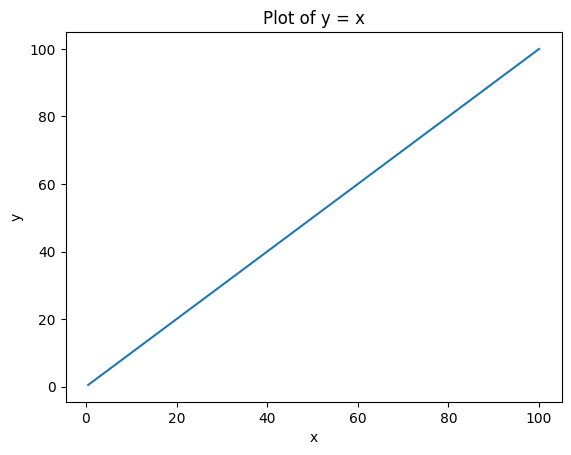

In [1]:
#Q9
import matplotlib.pyplot as plt
import numpy as np


import matplotlib as mpl

def y1(x):
  return x
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

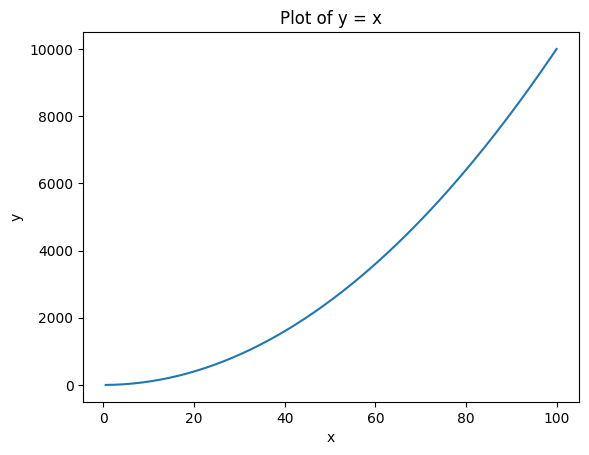

In [2]:
def y1(x):
  return x**2
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

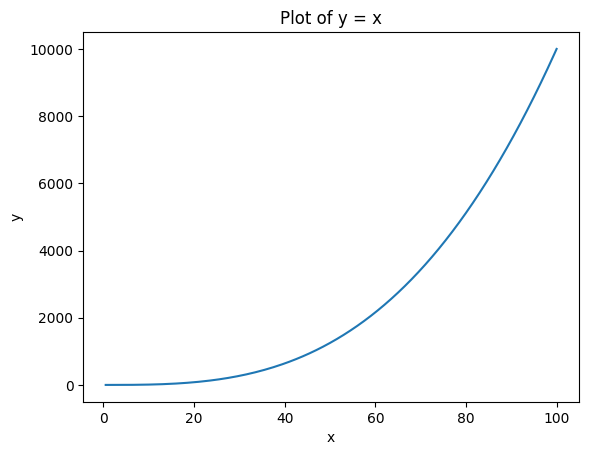

In [3]:
def y1(x):
  return x**3/100
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

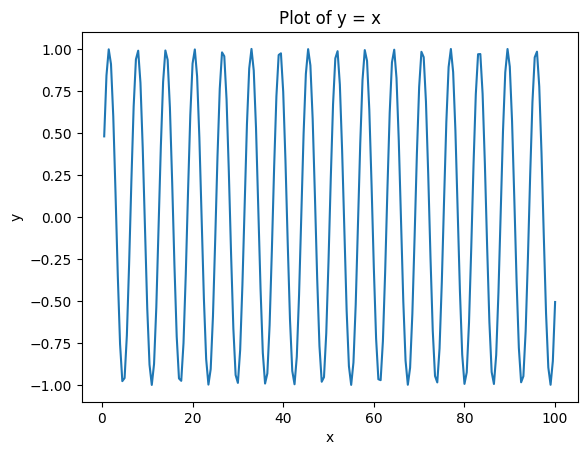

In [4]:
def y1(x):
  return np.sin(x)
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

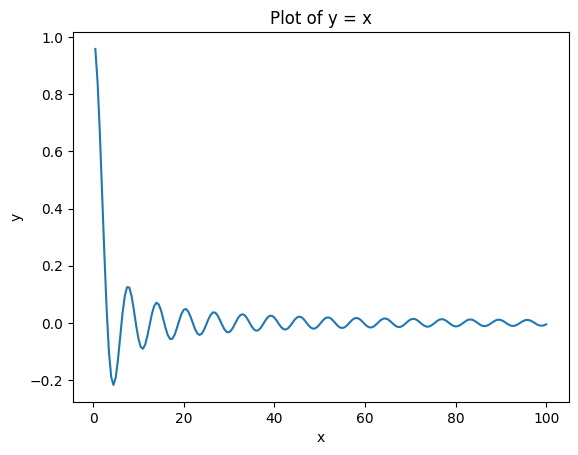

In [5]:
def y1(x):
  return np.sin(x)/x
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

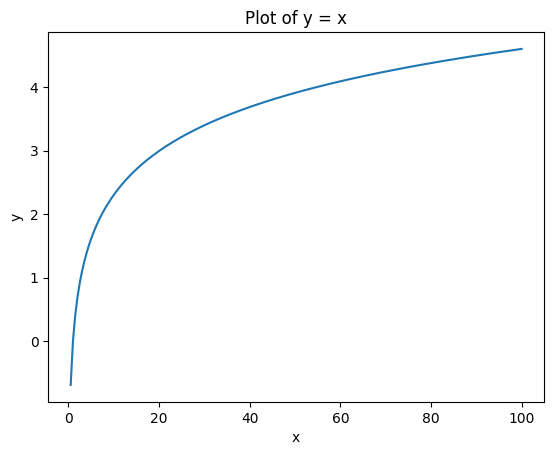

In [6]:
def y1(x):
  return np.log(x)
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

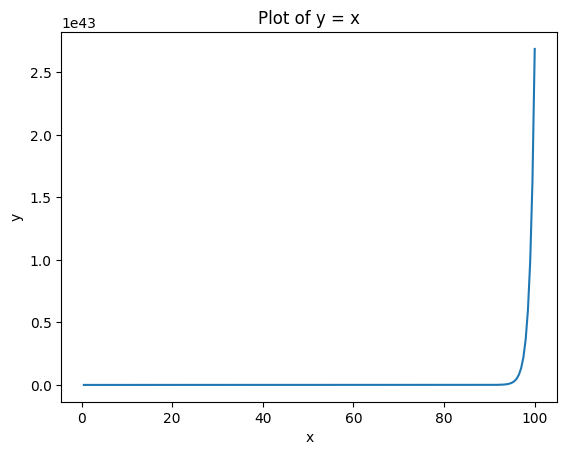

In [8]:
def y1(x):
  return np.exp(x)
x_values = np.arange(0.5, 100.5, 0.5)
y_values = y1(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


# Show the plot
plt.show()

In [14]:
#Q10
import pandas as pd
x = np.random.uniform(1, 2, size = (20,5))
df = pd.DataFrame(x, columns = ["a", "b", "c", "d", "e"])
print(df)
# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()
print("\nColumn with the highest standard deviation:", max_std_column)

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()
print("\nRow with the lowest mean:", min_mean_row)

           a         b         c         d         e
0   1.047503  1.680378  1.088165  1.416178  1.104372
1   1.285154  1.666585  1.560073  1.729905  1.627860
2   1.473648  1.318639  1.717854  1.777383  1.062775
3   1.917316  1.648093  1.144553  1.626443  1.721678
4   1.230195  1.890503  1.519406  1.479449  1.950681
5   1.290624  1.368039  1.070260  1.848877  1.523570
6   1.675842  1.909975  1.093248  1.259642  1.962530
7   1.951382  1.477862  1.438516  1.479284  1.089059
8   1.247287  1.528682  1.213354  1.811091  1.186244
9   1.902148  1.564483  1.928287  1.506809  1.273860
10  1.053360  1.587666  1.165933  1.932679  1.924905
11  1.644414  1.720641  1.488886  1.613102  1.589024
12  1.704006  1.860759  1.225144  1.222295  1.191528
13  1.929100  1.145324  1.226332  1.709929  1.770383
14  1.229865  1.793461  1.737800  1.951195  1.188082
15  1.178247  1.472518  1.722154  1.062099  1.016435
16  1.278538  1.991466  1.640749  1.398239  1.808939
17  1.575742  1.434212  1.649245  1.630783  1.

In [15]:
#Q11
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)


df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print(df)

# Find the number of rows where the value in the column "g" is "LT8"
lt8_rows_count = len(df[df['g'] == 'LT8'])
print("\nNumber of rows where the value in the column 'g' is 'LT8':", lt8_rows_count)

# Find the standard deviation of the column "f" for rows where "g" is "LT8" and "GT8" respectively
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nStandard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)

           a         b         c         d         e         f    g
0   1.047503  1.680378  1.088165  1.416178  1.104372  6.336596  LT8
1   1.285154  1.666585  1.560073  1.729905  1.627860  7.869577  LT8
2   1.473648  1.318639  1.717854  1.777383  1.062775  7.350299  LT8
3   1.917316  1.648093  1.144553  1.626443  1.721678  8.058082  GT8
4   1.230195  1.890503  1.519406  1.479449  1.950681  8.070234  GT8
5   1.290624  1.368039  1.070260  1.848877  1.523570  7.101370  LT8
6   1.675842  1.909975  1.093248  1.259642  1.962530  7.901238  LT8
7   1.951382  1.477862  1.438516  1.479284  1.089059  7.436104  LT8
8   1.247287  1.528682  1.213354  1.811091  1.186244  6.986657  LT8
9   1.902148  1.564483  1.928287  1.506809  1.273860  8.175587  GT8
10  1.053360  1.587666  1.165933  1.932679  1.924905  7.664542  LT8
11  1.644414  1.720641  1.488886  1.613102  1.589024  8.056068  GT8
12  1.704006  1.860759  1.225144  1.222295  1.191528  7.203732  LT8
13  1.929100  1.145324  1.226332  1.709929  1.77

Broadcasting automatically expands the smaller array to match the shape of the larger array, so that element-wise operations can be performed even if the shapes are not the same.

In [15]:
#Q12
a = np.array([1, 2, 3])
b = 2

# Broadcasting: Adding a scalar to an array
result = a + b

print("Array a:", a)
print("Scalar b:", b)
print("Result after broadcasting:", result)


Array a: [1 2 3]
Scalar b: 2
Result after broadcasting: [3 4 5]


In [12]:
#Q13
import numpy as np

def compute_argmin(arr):
    # Find the index of the minimum element using numpy.argmin
    argmin_index = np.argmin(arr)
    return argmin_index

# Example usage:
arr = np.array([3, 1, 4, 2, 5])
argmin_index = compute_argmin(arr)
print("Index of the minimum element:", argmin_index)

# Verify the solution using numpy.argmin
numpy_argmin_index = np.argmin(arr)
print("Numpy's argmin result:", numpy_argmin_index)

Index of the minimum element: 1
Numpy's argmin result: 1
